In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(Xtrain, ytrain), (Xtest, ytest) = datasets.cifar10.load_data()
Xtrain.shape
Xtest.shape
#ytrain is a 2d array, but we need 1D array only for classification
ytrain.shape
ytrain[:5]
ytrain = ytrain.reshape(-1,)
ytrain[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

Text(0.5, 0, 'truck')

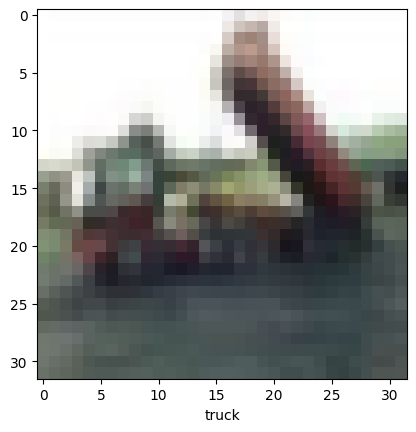

In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[2]
plt.imshow(Xtrain[2])
plt.xlabel(classes[ytrain[2]])

In [4]:
def plot_sample(X, y, index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

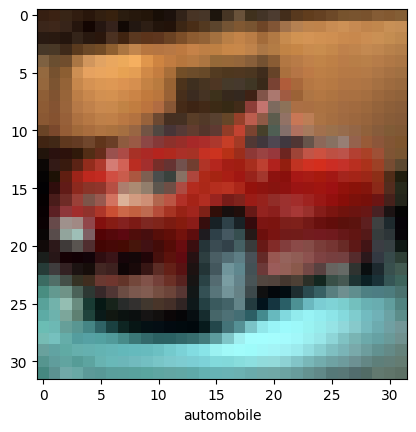

In [5]:
plot_sample(Xtrain, ytrain, 45)

In [6]:
Xtrain = Xtrain/255

Xtest = Xtest/255

In [7]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters = 64, kernel_size = (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    #dense NN
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
  ])

c:\Users\nilesh\anaconda3\envs\mllab\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

cnn.fit(Xtrain, ytrain, epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3592 - loss: 1.7378
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5905 - loss: 1.1709
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6446 - loss: 1.0250
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6682 - loss: 0.9466
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6956 - loss: 0.8748
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7175 - loss: 0.8109
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7313 - loss: 0.7752
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7509 - loss: 0.7168
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7641 - loss: 0.6727
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7786 - loss: 0.6385
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7891 - loss: 0.6091
Epoch 12/15
1563/15

In [9]:
cnn.evaluate(Xtest, ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7049 - loss: 0.9999


[1.024233341217041, 0.6976000070571899]

In [10]:
ytest = ytest.reshape(-1,)

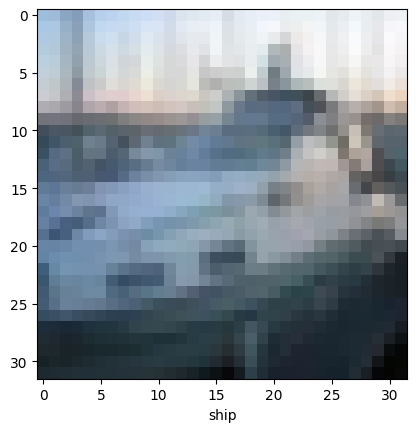

In [11]:
plot_sample(Xtest, ytest, 2)

In [12]:
ytest[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [13]:
ypred = cnn.predict(Xtest)

y_pred_classes = [np.argmax(element) for element in ypred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


'airplane'

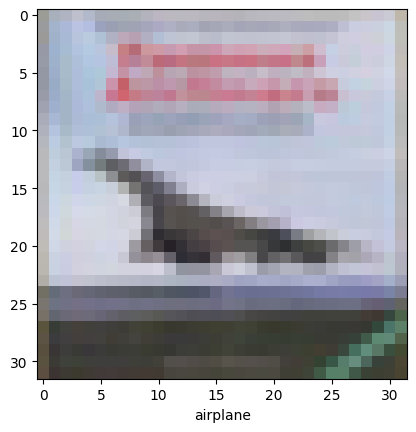

In [14]:
y_pred_classes[:10]

plot_sample(Xtest, ytest, 3)

classes[y_pred_classes[3]]

In [15]:
cnn.save('cnn_cifar10.h5')

In [16]:
import tkinter as tk
from tkinter import filedialog, Label, Button
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf

In [17]:
model = tf.keras.models.load_model('cnn_cifar10.h5')

In [18]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [19]:
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((32, 32)) 
    img = np.array(img)
    img = img / 255.0  
    img = np.expand_dims(img, axis=0)  
    return img

def predict_image(image_path):
    img = preprocess_image(image_path)  
    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    return class_index

def load_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        img = Image.open(file_path)
        img = img.resize((128, 128))
        img = ImageTk.PhotoImage(img)
        image_label.config(image=img)
        image_label.image = img      

        class_index = predict_image(file_path)
        class_name = classes[class_index]
        result_label.config(text=f"Predicted Class: {class_name}")
        

In [20]:
root = tk.Tk()

root.title("CIFAR-10 Image Classifier")



''

In [21]:
load_button = Button(root, text="Load Image", command=load_image)
load_button.pack(pady=10)
image_label = Label(root)
image_label.pack()
result_label = Label(root, text="")
result_label.pack(pady=10)

In [22]:
root.mainloop()